# OpenCV人脸检测

首先下载人脸预训练模型[haarcascades](https://github.com/opencv/opencv/tree/master/data/haarcascades)和[lbpcascades](https://github.com/opencv/opencv/tree/master/data/lbpcascades)

相关API和知识点:
- `CascadeClassifier()`：OpenCV中人脸检测的级联分类器
- `detectMultiScale()`：检测人脸的算法
    - `scaleFactor`：每次图像尺寸缩小的比例
    - `minNeighbors`：每个目标至少呗检测多少次才被判定为是人脸（周围的像素和不同的窗口都可能被检测为人脸）
    - `minSize`：目标的最小尺寸
- `Haar`：描述图像在局部范围内像素值明暗变换信息，使用大量正负样本训练得的分类器 [Haar级联检测器](https://zhuanlan.zhihu.com/p/100217697)
- `LBP`：描述图像在局部范围内对应的纹理信息 [LBP特征描述算子](https://zhuanlan.zhihu.com/p/150992751)

> 二者的区别:
> 1. HAAR特征是浮点数计算，LBP特征是整数计算； 
> 2. LBP训练需要的样本数量比HAAR大； 
> 3. LBP的速度一般比HAAR快； 
> 4. 同样的样本HAAR训练出来的检测结果要比LBP准确； 
> 5. 扩大LBP的样本数据可达到HAAR的训练效果

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

## 算法实现

In [2]:
def face_detection(img, min_size_factor=10):
    '''
    img: 原始图像
    min_size_factor: 图中人脸尺寸因子（1～100）越大代表人脸在图像中所占比例越大，默认情况下最小人脸占1/10图像
    '''
    # gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    face_detector = cv.CascadeClassifier('data/haarcascade_frontalface_default.xml')
    faces = face_detector.detectMultiScale(img, scaleFactor=1.1, minNeighbors=10, 
                                            minSize=((img.shape[0]*min_size_factor)//100, (img.shape[1]*min_size_factor)//100))
    print('共检测到%s个人脸' % len(faces))
    cv.putText(img, '%s faces detected' % len(faces), (faces[0][0], faces[0][1]-100), cv.FONT_HERSHEY_SIMPLEX, 5, (18,0,139), 10)
    for x, y, w, h in faces:
        cv.rectangle(img, pt1=(x, y), pt2=(x+w, y+h), color=(18,0,139), thickness=img.shape[0]//100)
    return img

在实验中更换HAAR和LBP两特征描述子分别进行试验

同时还尝试将原始图像转为灰度图再进行检测，但效果相差不大

## 检测单人脸

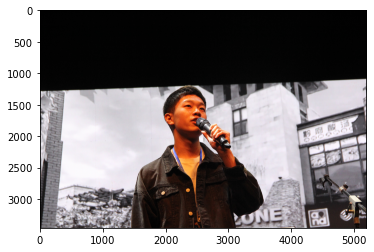

In [3]:
single_img = cv.imread('img/single.jpg')
plt.imshow(single_img[:,:,::-1])

共检测到1个人脸


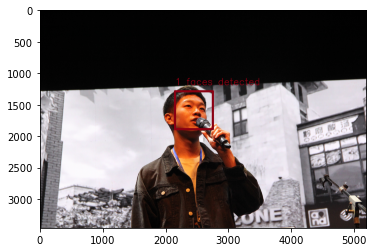

In [4]:
single_img_detected = face_detection(single_img)
plt.imshow(single_img_detected[:,:,::-1])

## 检测多人脸

共检测到5个人脸


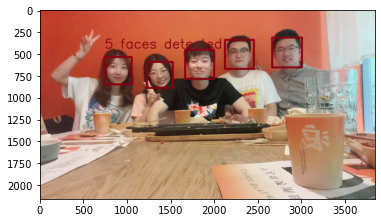

In [5]:
multi_img = cv.imread('img/multi.jpg')
multi_img_detected = face_detection(multi_img, 7)
plt.imshow(multi_img_detected[:,:,::-1])

共检测到20个人脸


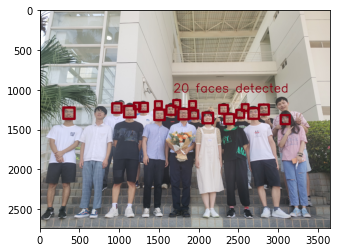

In [6]:
multi_img = cv.imread('img/multi2.jpg')
multi_img_detected = face_detection(multi_img, 2)
plt.imshow(multi_img_detected[:,:,::-1])

但从结果中也可以看到，一些非常明显的人脸也可能无法识别，猜想可能与图像本身质量较低有关，导致无法提取人脸特征

换LBP方法测试效果类似

## Resources

[Python+OpenCV图像处理之人脸检测](https://www.cnblogs.com/qianxia/p/11112645.html)

[python+opencv 实现图像人脸检测及视频中的人脸检测](https://cloud.tencent.com/developer/article/1699695)